In [2]:
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

import utils
from env import Maze
from agent import QAgent, TemporalDifferenceSuccessor
from RL import ReinforcementLearning

%load_ext autoreload
%autoreload 2

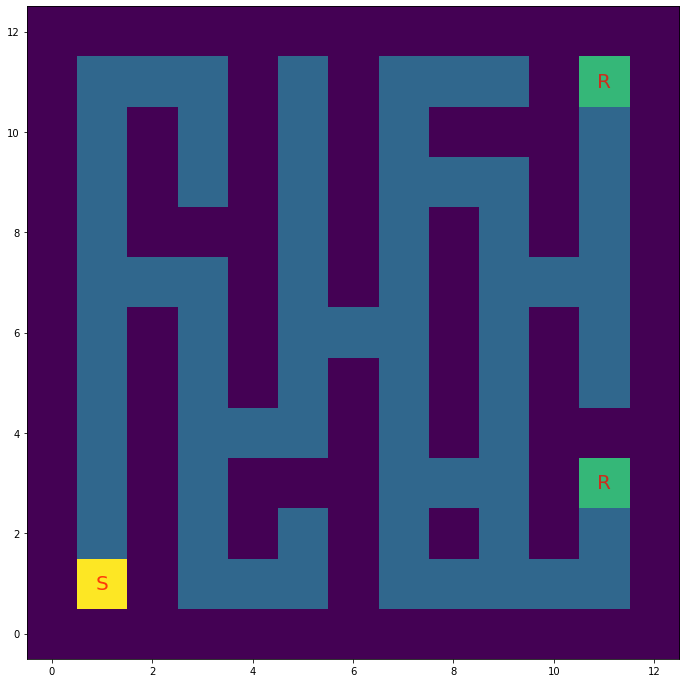

In [3]:
#Load in environment
with open('Environments/maze.pickle', 'rb') as handle:
    env_info = pickle.load(handle)
utils.plot((env_info['height'], env_info['width']), env_info['walls'], env_info['start_state'], env_info['reward_states'])
    
      

In [4]:
agent_info = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.5,
    'discount_factor':0.9,
    'epsilon':0.05,
}

In [5]:
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

In [6]:
RL.rl_init(env_info, agent_info)

100%|██████████| 5000/5000 [00:10<00:00, 476.41it/s]


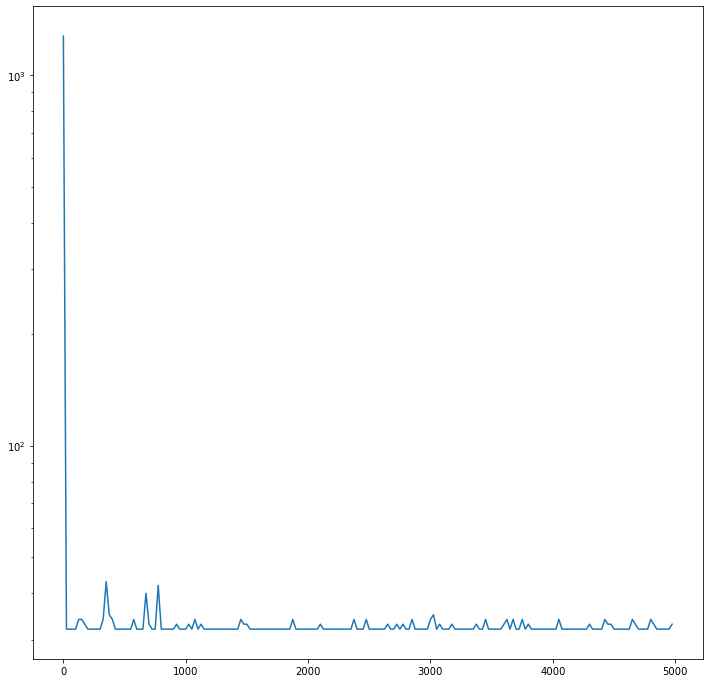

In [10]:
NUM_EPISODES = 5000
NUM_EPISODES_EXPLORATION = 5

num_steps = []

RL.rl_init(env_info, agent_info)

RL.rl_change_epislon(1)

for episode in tqdm(range(NUM_EPISODES)):
    if episode==NUM_EPISODES_EXPLORATION:
        RL.rl_change_epislon(0.01)
        
    RL.rl_episode()
    if episode%25==0:
        num_steps.append(RL.num_steps)
        

plt.figure(figsize=(12, 12))
plt.plot(range(0, NUM_EPISODES, 25), num_steps)
plt.yscale("log")
plt.show()

In [ ]:
#Change the task every 200 steps

RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

NUM_EPISODES = 700

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9)]


RL.rl_init(env_info, agent_info)


RL.rl_plot()

for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%200==0:
        index = episode//200
        RL.rl_change_task(reward_states=[reward_states[index-1]])
        
        RL.rl_plot()
    
    RL.rl_episode()
    
    if episode%25==0:
        num_steps.append(RL.num_steps)
        

plt.figure(figsize=(12, 12))
plt.plot(range(0, NUM_EPISODES, 25), num_steps)
plt.yscale("log")
plt.show()

In [ ]:
RL = ReinforcementLearning(Maze, QAgent)

In [ ]:
#Change the task every 200 steps

NUM_EPISODES = 700

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9)]


RL.rl_init(env_info, agent_info)


RL.rl_plot()

for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%200==0:
        index = episode//200
        RL.rl_change_task(reward_states=[reward_states[index-1]])
        
        RL.rl_plot()
    
    RL.rl_episode()
    
    if episode%25==0:
        num_steps.append(RL.num_steps)
        

plt.figure(figsize=(12, 12))
plt.plot(range(0, NUM_EPISODES, 25), num_steps)
plt.yscale("log")
plt.show()

## Hyperparameter tuning

In [ ]:
#Get parameter that minimize the number of steps for the static maze

import pandas as pd

df_track = pd.DataFrame(columns=['step_size', 'discount_factor', 'epsilon', 'num_steps_1000', 'max_num_steps', 'min_num_steps', 'mean_num_steps'])

agent = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.7,
    'discount_factor':0.1,
    'epsilon':0.1,
    
}

for step_size in tqdm([0.1, 0.3, 0.6, 0.9]):
    agent_info['step_size'] = step_size
    for discount_factor in [0.1, 0.3, 0.6, 0.9]:
        agent_info['discount_factor'] = discount_factor
        for epsilon in [0.005, 0.01, 0.03, 0.1]:
            agent_info['epsilon'] = epsilon
            RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

            NUM_EPISODES = 500

            num_steps = []

            RL.rl_init(env_info, agent)

            for episode in range(NUM_EPISODES):
                RL.rl_episode()

                if episode%25==0:
                    num_steps.append(RL.num_steps)
                    
            df_track = df_track.append({
                'step_size':step_size,
                'discount_factor':discount_factor,
                'epsilon':epsilon,
                'num_steps_1000':num_steps[-1],
                'max_num_steps':max(num_steps),
                'min_num_steps':min(num_steps),
                'mean_num_steps':np.mean(num_steps)
            }, ignore_index=True)
                    
                    
                
                    
                    
                    
            


In [ ]:
df_track[df_track['mean_num_steps']==min(df_track['mean_num_steps'])]

In [ ]:
#For Q-Agent
#Get parameter that minimize the number of steps for the static maze

import pandas as pd

df_track = pd.DataFrame(columns=['step_size', 'discount_factor', 'epsilon', 'num_steps_1000', 'max_num_steps', 'min_num_steps', 'mean_num_steps'])

agent = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.7,
    'discount_factor':0.1,
    'epsilon':0.1,
    
}

for step_size in tqdm([0.1, 0.3, 0.6, 0.9]):
    agent_info['step_size'] = step_size
    for discount_factor in [0.1, 0.3, 0.6, 0.9]:
        agent_info['discount_factor'] = discount_factor
        for epsilon in [0.005, 0.01, 0.03, 0.1]:
            agent_info['epsilon'] = epsilon
            RL = ReinforcementLearning(Maze, QAgent)

            NUM_EPISODES = 500

            num_steps = []

            RL.rl_init(env_info, agent)

            for episode in range(NUM_EPISODES):
                RL.rl_episode()

                if episode%25==0:
                    num_steps.append(RL.num_steps)
                    
            df_track = df_track.append({
                'step_size':step_size,
                'discount_factor':discount_factor,
                'epsilon':epsilon,
                'num_steps_1000':num_steps[-1],
                'max_num_steps':max(num_steps),
                'min_num_steps':min(num_steps),
                'mean_num_steps':np.mean(num_steps)
            }, ignore_index=True)
                    
                    
                
                    
                    
                    
            



In [ ]:
df_track[df_track['mean_num_steps']==min(df_track['mean_num_steps'])]

In [ ]:
#change environment every 200 steps
#Get parameter that minimize the number of steps for the static maze

import pandas as pd

df_track = pd.DataFrame(columns=['step_size', 'discount_factor', 'epsilon', 'num_steps_1000', 'max_num_steps', 'min_num_steps', 'mean_num_steps'])

agent = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.7,
    'discount_factor':0.1,
    'epsilon':0.1,
    
}
reward_states = [(9, 3), (11, 11), (11, 9)]

for step_size in tqdm([0.1, 0.3, 0.6, 0.9]):
    agent_info['step_size'] = step_size
    for discount_factor in [0.1, 0.3, 0.6, 0.9]:
        agent_info['discount_factor'] = discount_factor
        for epsilon in [0.005, 0.01, 0.03, 0.1]:
            agent_info['epsilon'] = epsilon
            RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

            NUM_EPISODES = 500

            num_steps = []

            RL.rl_init(env_info, agent)
            

            for episode in range(1, NUM_EPISODES+1):
                
                if episode%200==0:
                    index = episode//200
                    RL.rl_change_task(reward_states=[reward_states[index-1]])
                
                
                RL.rl_episode()
                    

                if episode%25==0:
                    num_steps.append(RL.num_steps)
                    
            df_track = df_track.append({
                'step_size':step_size,
                'discount_factor':discount_factor,
                'epsilon':epsilon,
                'num_steps_1000':num_steps[-1],
                'max_num_steps':max(num_steps),
                'min_num_steps':min(num_steps),
                'mean_num_steps':np.mean(num_steps)
            }, ignore_index=True)
                    
                    
                
                    
                    
                    
            



In [ ]:
df_track[df_track['mean_num_steps']==min(df_track['mean_num_steps'])]

In [ ]:
#change environment every 200 steps
#Get parameter that minimize the number of steps for the static maze

import pandas as pd

df_track = pd.DataFrame(columns=['step_size', 'discount_factor', 'epsilon', 'num_steps_1000', 'max_num_steps', 'min_num_steps', 'mean_num_steps'])

agent = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.7,
    'discount_factor':0.1,
    'epsilon':0.1,
    
}
reward_states = [(9, 3), (11, 11), (11, 9)]

for step_size in tqdm([0.1, 0.3, 0.6, 0.9]):
    agent_info['step_size'] = step_size
    for discount_factor in [0.1, 0.3, 0.6, 0.9]:
        agent_info['discount_factor'] = discount_factor
        for epsilon in [0.005, 0.01, 0.03, 0.1]:
            agent_info['epsilon'] = epsilon
            RL = ReinforcementLearning(Maze, QAgent)

            NUM_EPISODES = 500

            num_steps = []

            RL.rl_init(env_info, agent)
            

            for episode in range(1, NUM_EPISODES+1):
                
                if episode%200==0:
                    index = episode//200
                    RL.rl_change_task(reward_states=[reward_states[index-1]])
                
                
                RL.rl_episode()
                    

                if episode%25==0:
                    num_steps.append(RL.num_steps)
                    
            df_track = df_track.append({
                'step_size':step_size,
                'discount_factor':discount_factor,
                'epsilon':epsilon,
                'num_steps_1000':num_steps[-1],
                'max_num_steps':max(num_steps),
                'min_num_steps':min(num_steps),
                'mean_num_steps':np.mean(num_steps)
            }, ignore_index=True)

In [ ]:
df_track[df_track['mean_num_steps']==min(df_track['mean_num_steps'])]

In [ ]:
agent_info = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.6,
    'epsilon':0.03,
    
}

#Change the task every 200 steps

RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

NUM_EPISODES = 700

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9)]


RL.rl_init(env_info, agent_info)


RL.rl_plot()

for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%200==0:
        index = episode//200
        RL.rl_change_task(reward_states=[reward_states[index-1]])
        
        RL.rl_plot()
    
    RL.rl_episode()
    
    if episode%25==0:
        num_steps.append(RL.num_steps)
        

plt.figure(figsize=(12, 12))
plt.plot(range(0, NUM_EPISODES, 25), num_steps)
plt.yscale("log")
plt.show()

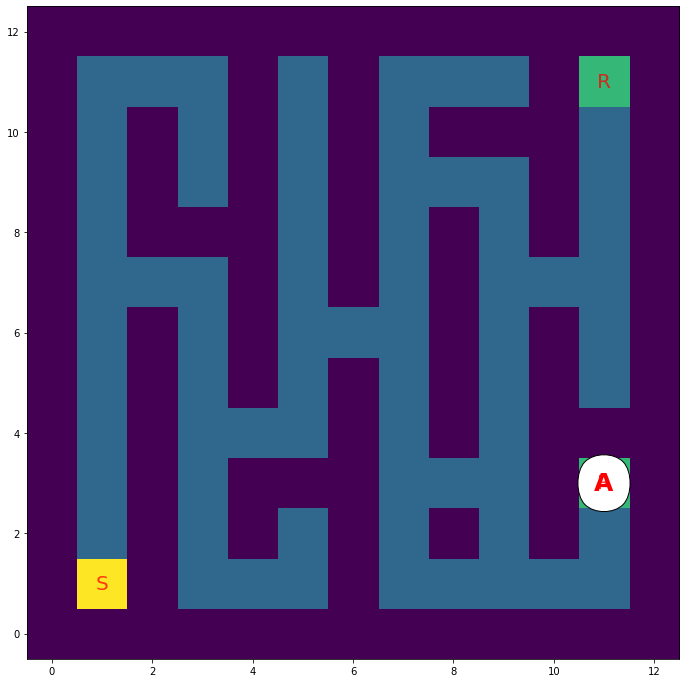

  0%|          | 0/39 [00:00<?, ?it/s]

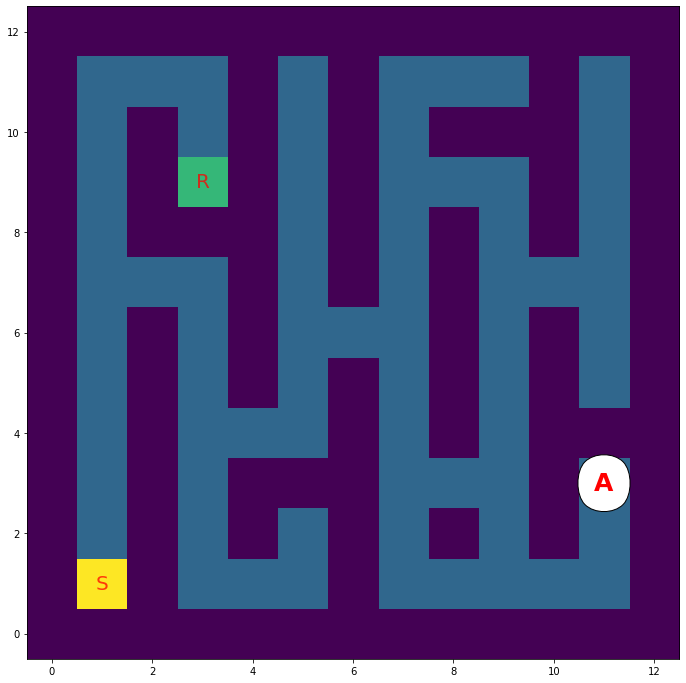

 38%|███▊      | 15/39 [00:08<00:11,  2.07it/s]

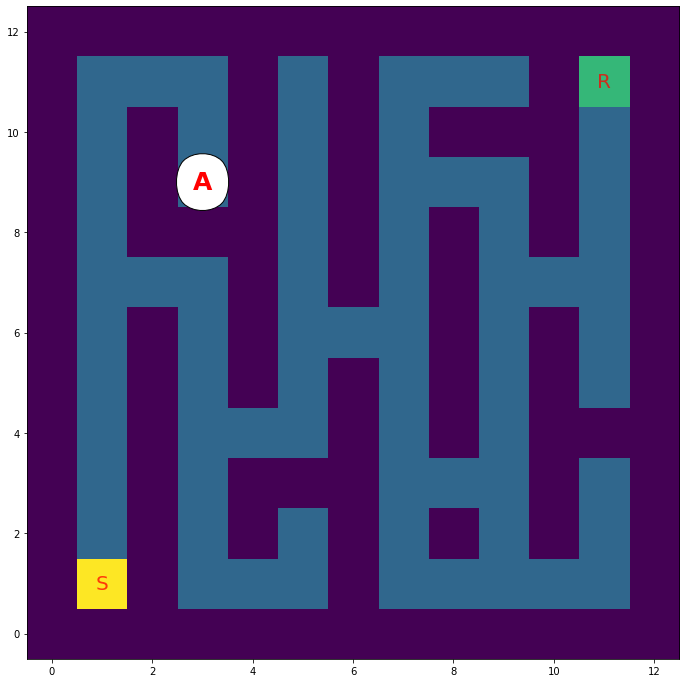

 69%|██████▉   | 27/39 [00:12<00:03,  3.30it/s]

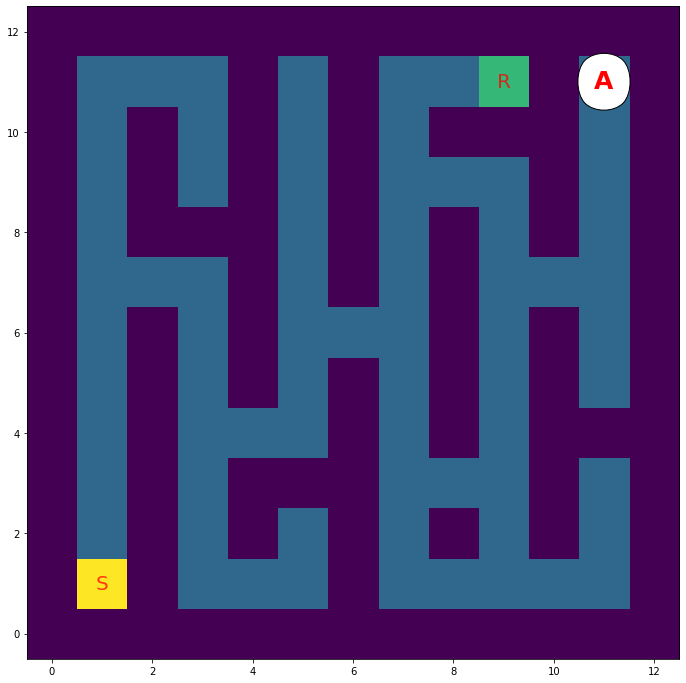

100%|██████████| 39/39 [00:14<00:00,  2.75it/s]


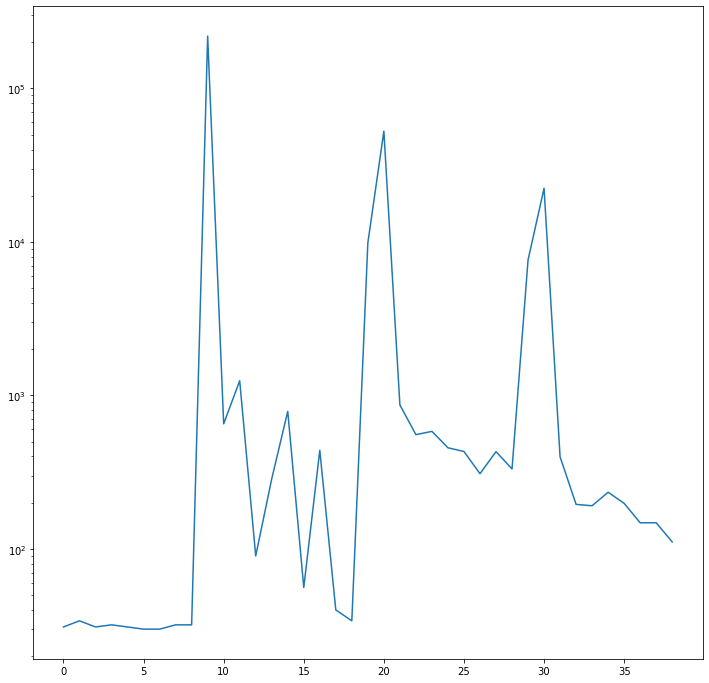

In [36]:
agent_info = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.005,
    
}

#Change the task every 200 steps

RL = ReinforcementLearning(Maze, QAgent)

NUM_EPISODES = 39

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9)]


RL.rl_init(env_info, agent_info)


#Latent learning
agent_info['epsilon'] = 1
for episode in range(50):
    RL.rl_episode()
    
RL.rl_change_epislon(0.05)

RL.rl_plot()

for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%10==0:
        index = episode//10
        RL.rl_change_task(reward_states=[reward_states[index-1]])
        
        RL.rl_plot()
    
    RL.rl_episode()
    
    if episode%1==0:
        num_steps.append(RL.num_steps)
        

plt.figure(figsize=(12, 12))
plt.plot(range(0, NUM_EPISODES, 1), num_steps)
plt.yscale("log")
plt.show()

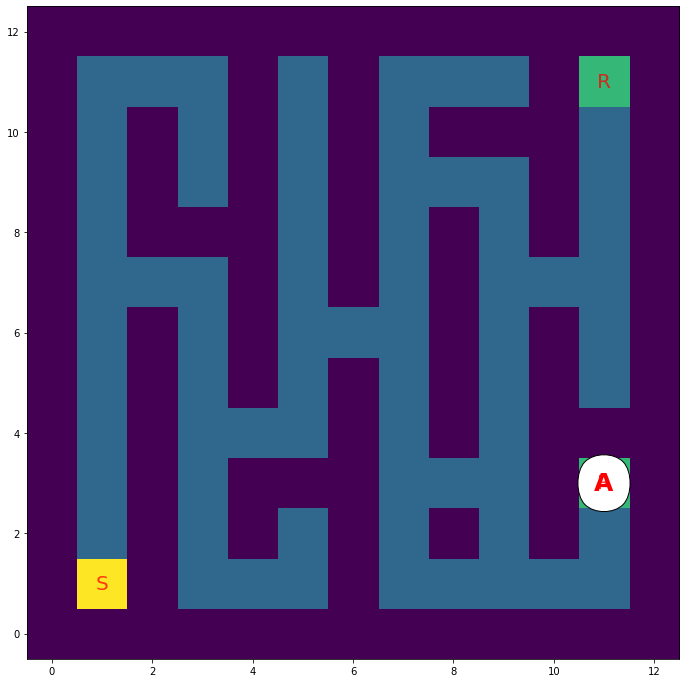

  0%|          | 0/39 [00:00<?, ?it/s]

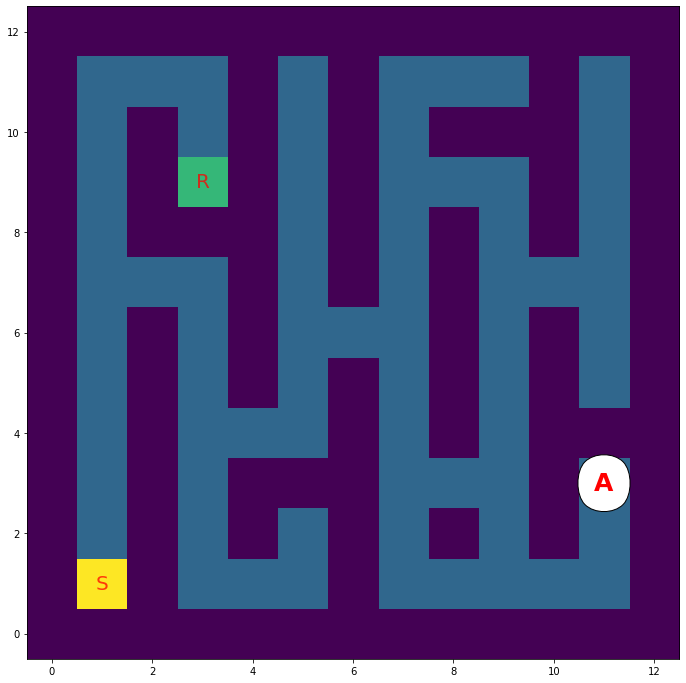

 26%|██▌       | 10/39 [00:02<00:06,  4.39it/s]

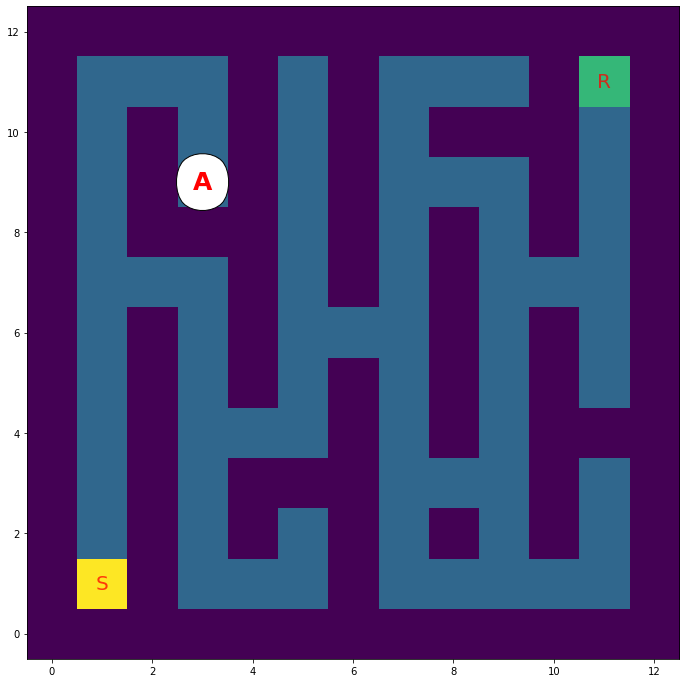

 72%|███████▏  | 28/39 [00:03<00:01,  9.55it/s]

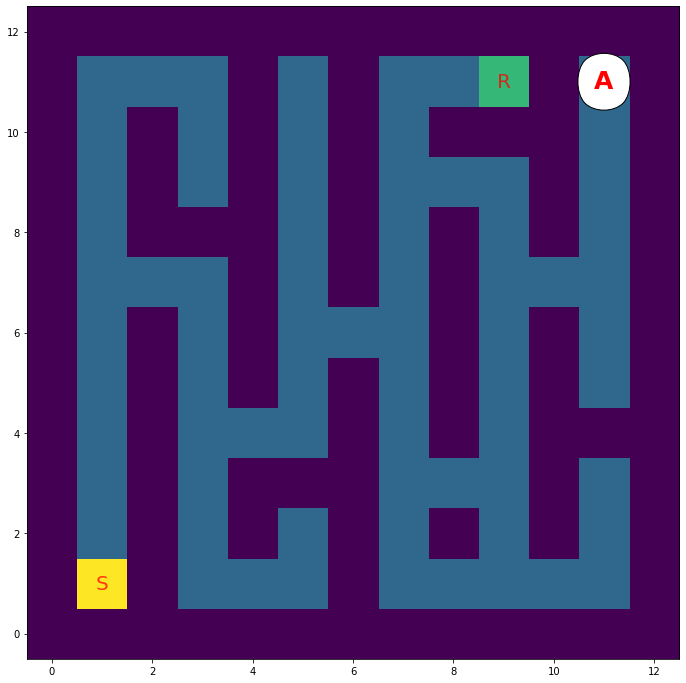

100%|██████████| 39/39 [00:04<00:00,  8.36it/s]


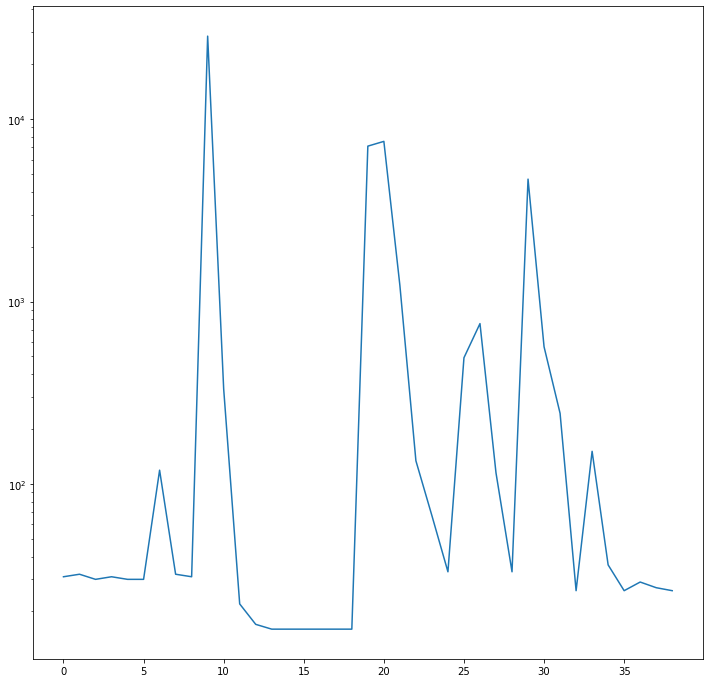

In [37]:
agent_info = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.6,
    'epsilon':0.03,
    
}

#Change the task every 200 steps

RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

NUM_EPISODES = 39

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9)]


RL.rl_init(env_info, agent_info)


#Latent learning
agent_info['epsilon'] = 1
for episode in range(50):
    RL.rl_episode()
    
RL.rl_change_epislon(0.03)

RL.rl_plot()

for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%10==0:
        index = episode//10
        RL.rl_change_task(reward_states=[reward_states[index-1]])
        
        RL.rl_plot()
    
    RL.rl_episode()
    
    if episode%1==0:
        num_steps.append(RL.num_steps)
        

plt.figure(figsize=(12, 12))
plt.plot(range(0, NUM_EPISODES, 1), num_steps)
plt.yscale("log")
plt.show()

In [ ]:
def test_agent(env, agent, env_info, agent_info, num_steps):
    
    #Initilize the environment
    env = env()
    env.env_init(env_info)
    
    agent = agent()
    agent.agent_init(agent_info)
    
    observation = env.env_start()
    
    action = agent.agent_start(observation[1])
    
    episodes = 0
    
    for step in range(5):
        observation = env.env_step(action)
        
        if observation[2]:
            agent.agent_stop(observation[0], observation[1])
            action = agent.agent_start(observation[1])
            episodes += 1
            
        else:
            action = agent.agent_step(observation[0], observation[1])
            if episodes > 2:
                print(agent.w)
        
        
    
    for step in range(num_steps):
        observation = env.env_step(action)
        
        if observation[2]:
            agent.agent_stop(observation[0], observation[1])
            
        else:
            action = agent.agent_step(observation[0], observation[1])
        
        
        #print(agent.num_steps)
        #print(np.sum(agent.Q))
        
    return env, agent